In [1]:
#load libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# df = pd.read_csv("spot_15_23.csv")
df = pd.read_csv("spotify_data.csv")

In [16]:
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


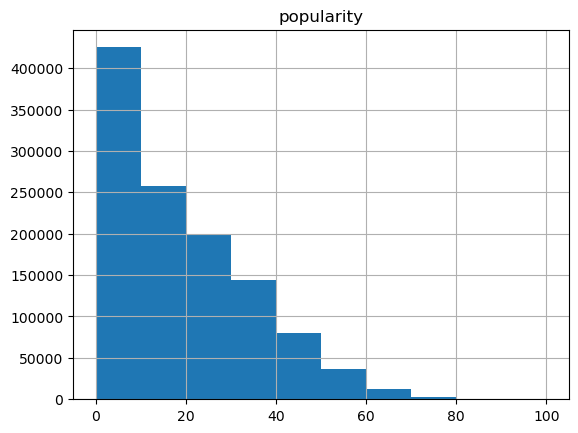

In [17]:
df.hist(column="popularity", bins=10)
plt.show()

In [18]:
df["popularity_bins"] = pd.cut(
    x = df["popularity"],
    bins = [-1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    labels = ["<=10", "11-20","21-30","31-40","41-50", "51-60", "61-70", "71-80", "81-90", ">90"]
    # bins = [-1, 30, 70, 100],
    # labels = ["low", "med", "high"]
    # bins = [-1, 25, 50, 75, 100],
    # labels = ["<=25", "26-50", "51-75", ">=76"]
)
# df.info()
df["popularity_bins"].value_counts()

<=10     453764
11-20    251475
21-30    194426
31-40    137242
41-50     75159
51-60     33804
61-70     11025
71-80      2503
81-90       349
>90          17
Name: popularity_bins, dtype: int64

In [42]:
# Select popularity 80 < and <= 100
over81 = df[df['popularity'] > 80]

# Select popularity 60 < and <= 80
bet6180 = df[df['popularity'] <= 80]
bet6180 = bet6180[bet6180['popularity'] > 60]

# Select popularity 40 < and <= 60
bet4160 = df[df['popularity'] <= 60]
bet4160 = bet4160[bet4160['popularity'] > 40]

# Select popularity 20 < and <= 40
bet2140 = df[df['popularity'] <= 40]
bet2140 = bet2140[bet2140['popularity'] > 20]

# Select popularity 0 < and <= 20
bet0120 = df[df['popularity'] <= 20]
bet0120 = bet0120[bet0120['popularity'] > 0]

In [45]:
over81
bet6180
bet4160
bet2140
bet0120

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
176,176,Joshua Radin,Underwater,5EXiJK0i9B9zWvkYZd1iFt,18,2012,acoustic,0.406,0.487,1,-10.958,1,0.0333,0.487000,0.124000,0.1080,0.3410,107.746,284333,4
190,190,AJJ,Skipping Stone,51ocbwPg5kEeDgZH1eQ71J,19,2012,acoustic,0.762,0.628,0,-4.554,1,0.0379,0.531000,0.000000,0.1070,0.8290,106.092,115227,4
191,191,AJJ,This Is Not a War,7lwkgy6neVU6WYeeZmwoeC,20,2012,acoustic,0.684,0.601,7,-4.644,1,0.0431,0.275000,0.000000,0.1240,0.7320,109.192,197747,4
194,194,AJJ,Hate & Kill,2g1NxVJac1P1grmNp5mfb4,20,2012,acoustic,0.436,0.990,9,-5.326,1,0.0814,0.000043,0.000176,0.1410,0.1160,103.560,74533,4
200,200,Johnnyswim,Heart Beats,1lh0ca3jjIysThpLxfjMH2,19,2012,acoustic,0.465,0.752,11,-5.003,0,0.0494,0.466000,0.000000,0.1380,0.3410,129.766,206646,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159758,1473390,Nicola Conte,Mystery of You,2Ktc7RQiZrqtjd0Gd4Gs61,7,2011,trip-hop,0.551,0.728,9,-6.904,0,0.0355,0.468000,0.000013,0.1180,0.4670,89.969,261733,4
1159759,1473391,Nicola Conte,Black Spirits,0m27F0IGHLGAWhqd6ccYst,4,2011,trip-hop,0.373,0.742,10,-6.453,0,0.0736,0.325000,0.000141,0.1590,0.5220,107.951,344013,3
1159760,1473392,Nicola Conte,Quiet Dawn,6er9p611eHEcUCU50j7D57,3,2011,trip-hop,0.516,0.675,7,-7.588,0,0.0326,0.788000,0.000129,0.1300,0.2640,119.897,285067,4
1159761,1473393,Amon Tobin,Morning Ms Candis,7jsMMqxy1tt0rH5FzYcZTQ,2,2011,trip-hop,0.491,0.440,5,-8.512,1,0.0274,0.477000,0.003130,0.0936,0.0351,100.076,214253,4


In [50]:
selected_over80 = over81
selected_bet_61_80 = bet6180.sample(n = 1000, random_state = 1)
selected_bet_41_60 = bet4160.sample(n = 1000, random_state = 1)
selected_bet_21_40 = bet2140.sample(n = 1000, random_state = 1)
selected_bet_01_20 = bet0120.sample(n = 500, random_state = 1)

In [51]:
frames = [selected_over80, selected_bet_61_80, selected_bet_41_60, selected_bet_21_40, selected_bet_01_20]
result = pd.concat(frames)

In [53]:
result

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
12104,12104,Bruno Mars,Locked out of Heaven,3w3y8KPTfNeOKPiqUTakBh,85,2012,dance,0.726,0.698,5,-4.165,1,0.0431,0.049000,0.000000,0.3090,0.8670,143.994,233478,4
32070,32070,Frank Ocean,Lost,3GZD6HmiNUhxXYf8Gch723,82,2012,hip-hop,0.913,0.603,8,-4.892,1,0.2260,0.027200,0.000503,0.1670,0.4970,123.061,234093,4
40342,40342,Bruno Mars,When I Was Your Man,0nJW01T7XtvILxQgC5J7Wh,87,2012,pop,0.612,0.280,0,-8.648,1,0.0434,0.932000,0.000000,0.0880,0.3870,72.795,213827,4
40346,40346,One Direction,What Makes You Beautiful,4cluDES4hQEUhmXj6TXkSo,82,2012,pop,0.726,0.787,4,-2.494,1,0.0737,0.009000,0.000000,0.0596,0.8880,124.990,199987,4
66269,66269,Avicii,Wake Me Up,0nrRP2bk19rLc0orkWPQk2,84,2013,dance,0.532,0.783,2,-5.697,1,0.0523,0.003800,0.001200,0.1610,0.6430,124.080,247427,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840283,989484,Khors,Trees Are Remembers,7wjJrH0oUjdvvXxn5kYLT8,1,2005,black-metal,0.239,0.759,2,-8.500,1,0.0495,0.000002,0.957000,0.1770,0.1140,75.117,289985,4
839451,988594,Yuichiro Fujimoto,Drawing Of Stars,0TMhSOjfkvKQaoPfukFJwZ,6,2005,ambient,0.391,0.109,4,-19.083,1,0.0827,0.403000,0.617000,0.0810,0.0337,53.069,390640,5
1014221,1250167,Kerry Butler,It's a Small World / God Help the Outcasts,4dqvtMyXaYkFrtgZjTXJqP,2,2008,show-tunes,0.184,0.110,6,-14.965,1,0.0384,0.912000,0.000196,0.1270,0.2010,78.524,266733,3
318570,318570,Eartheater,Switch,2L3D9Vp9c4VGFdwSPwdFD4,16,2018,club,0.282,0.313,11,-16.656,0,0.0400,0.368000,0.189000,0.1120,0.1580,118.615,277117,4


In [56]:
compression_opts = dict(method='zip', archive_name='out.csv')  
result.to_csv('out.zip', index=True, compression=compression_opts)